# Deep Learning Tutorial

## Introduction

One of the machine learning technique that learns features directly from data. With the amount of data increasing, machine learning techniques are insufficient in terms of performance and deep learning gives better performance and accuracy.

Deep learning is used in speech recognition, image classification, natural language processing or recommendation systems.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

We will be using the "sign language digit datatset", there are $2062$ sign language digit images, where digits are from $0$ to $9$, so there are only $10$ unique signs. 

At the beginning, we will only make use of $0$ and $1$, just for simplicity. 

In this data, sign $0$ is between indexes $204$ and $408$, number of zero signs are 205, and $1$ is between $822$ and $1027$, and they are $206$ in number, so we will be using $205$ samples from each. 

$X$ is the image array, (zero and one signs), while $Y$ is the label array (0 and 1)

(-0.5, 63.5, 63.5, -0.5)

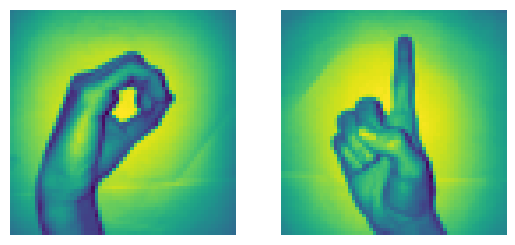

In [2]:

# Load dataset
x_l = np.load('sign_language_dataset/X.npy')
y_l = np.load('sign_language_dataset/Y.npy')

img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

In order to create an image array, we have to concatenate zero sign and one sign arrays, then create a label array 0 for zero sign images and 1 for one sign images.

In [3]:
# join a sequence of arrays along a new axis.
X = np.concatenate((x_l[204:409], x_l[822:1027]), axis = 0)

z = np.zeros(205)
o = np.ones(205)

Y = np.concatenate((z,o), axis = 0 ).reshape(X.shape[0],1)

print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


**What do these dimensions means?**

<li> The shape of X is (410,64,64). which can be seen as:
    410 number of images (in total)
    64 is the size of image, i.e 64x64

<li> The shape of Y is (410,1)
    410 means the 410 labels that we have, 0 and 1s

Now, we have to do the test train split of 75-15, make sure to use the same seed while randomizing, so that if we call this test train split again and again, we always create the same distribution.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

print("Number of train: ", number_of_train)
print("Number of test: ", number_of_test)

Number of train:  348
Number of test:  62


Now, since our X dataset is images, which is a 3 dimensional input array, we need to flatten it to make use of it as an input for our first deep learning model. Our labels Y are alreast 2D

In [5]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2]) 
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])

print("X train flatten", X_train_flatten.shape)
print("X test flatten", X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


As you can see, we have 348 images and each image has 4096 pixels in image train array.
Also, we have 62 images and each image has 4096 pixels in image test array.

**Side Note**

How does this flattening works?

In [6]:
import numpy as np

# Original 3D dataset: 5 images, each 3x3
X_train_example = np.array([
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]],
    
    [[10, 11, 12],
     [13, 14, 15],
     [16, 17, 18]],
    
    [[19, 20, 21],
     [22, 23, 24],
     [25, 26, 27]],
    
    [[28, 29, 30],
     [31, 32, 33],
     [34, 35, 36]],
    
    [[37, 38, 39],
     [40, 41, 42],
     [43, 44, 45]]
])

print("Original shape of X_train:", X_train_example.shape)

Original shape of X_train: (5, 3, 3)


This output means you have 5 images, each with a shape of 3x3 pixels.

### Flatten the Images

In [7]:
number_of_train_example = X_train_example.shape[0]  # 5 images
X_train_flatten_example = X_train_example.reshape(number_of_train_example, X_train_example.shape[1] * X_train_example.shape[2])

print("Flattened shape of X_train:", X_train_flatten_example.shape)
print("X_train_flatten:\n", X_train_flatten_example)

Flattened shape of X_train: (5, 9)
X_train_flatten:
 [[ 1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18]
 [19 20 21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34 35 36]
 [37 38 39 40 41 42 43 44 45]]


### Explanation of the Flattened Array

The shape `(5, 9)` indicates:
- There are 5 rows, one for each image.
- Each row has 9 values, representing each pixel in the original 3x3 image (flattened).

Each row in `X_train_flatten` now contains a flattened version of the original 3x3 image. Here’s what each row represents:

- **First image:** `[1, 2, 3, 4, 5, 6, 7, 8, 9]`
- **Second image:** `[10, 11, 12, 13, 14, 15, 16, 17, 18]`
- **Third image:** `[19, 20, 21, 22, 23, 24, 25, 26, 27]`
- **Fourth image:** `[28, 29, 30, 31, 32, 33, 34, 35, 36]`
- **Fifth image:** `[37, 38, 39, 40, 41, 42, 43, 44, 45]`

### Why This Works

Flattening an image essentially "unrolls" each 2D matrix (image) into a single row. For a 3x3 image, we take each row and lay it out end-to-end:
- The first row `[1, 2, 3]` becomes the first three elements in the flattened row.
- The second row `[4, 5, 6]` follows.
- The third row `[7, 8, 9]` completes the row.

This process is repeated for each image, resulting in a 2D array where each row represents a flattened version of the original 2D image.

---

### Recap

- **Original shape:** `(5, 3, 3)` — 5 images, each 3x3 pixels.
- **Flattened shape:** `(5, 9)` — 5 rows, each representing a flattened 3x3 image with 9 pixels.

This code enables you to transform your images into a format suitable for feeding into certain machine learning models.

**back to the original code**

In [8]:
# let's take a transpose of the flattened dataset
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


### Why Transpose the Data?

Transposing `X_train`, `X_test`, `y_train`, and `y_test` is typically done to adjust the data’s shape to match the expected input format for certain machine learning models, especially in deep learning frameworks.

---

#### 1. Understanding the Shape of Flattened Data

After flattening, suppose `X_train_flatten` has a shape of `(number_of_train, height * width)`. For example:
- `X_train_flatten.shape` might be `(1000, 4096)` for 1000 images, each flattened into a vector of size 4096.

Most deep learning frameworks expect data in the shape **(features, samples)** rather than **(samples, features)**, particularly for specific types of models or when working directly with linear algebra operations.

---

#### 2. Why Transpose?

When we transpose `X_train` and `X_test`, we change their shape from:
- `(samples, features)` to `(features, samples)`

Similarly, for the labels `y_train` and `y_test` (assuming they are one-dimensional vectors of shape `(samples,)`), transposing converts them into a 2D shape `(1, samples)`, which is often required for certain models that use vectorized operations.

---

#### 3. Example

Suppose the data shapes are as follows:
- `X_train_flatten.shape` = `(1000, 4096)`
- `y_train.shape` = `(1000,)`

After transposing:
- `X_train_flatten.T` shape = `(4096, 1000)`
- `y_train.T` shape = `(1, 1000)`

This new shape makes it easier to perform operations on a **feature-by-feature basis across samples**, which can be beneficial for vectorized operations in machine learning libraries.

---

#### 4. Practical Reasons

The need for transposing usually arises in these situations:
- **Matrix Multiplications**: Some models or linear algebra operations expect the features to be along the rows rather than the columns.
- **Framework Expectations**: Certain libraries or algorithms (such as neural network layers in some frameworks) may expect input data in a `(features, samples)` format.
- **Batch Processing**: Transposed data can facilitate efficient calculations, especially for batch processing and gradient calculations during backpropagation.

---

### Summary

Transposing the data helps reformat it to align with the model’s input requirements or the framework's expectations, enabling efficient calculations, particularly for batch processing and vectorized operations.

# Logistic Regression

## Computation Graph

They are a nice way to thing about mathematical expressions, for example, if we have
$$ c = \sqrt{a^2 + b^2} $$

It's computation graph is:

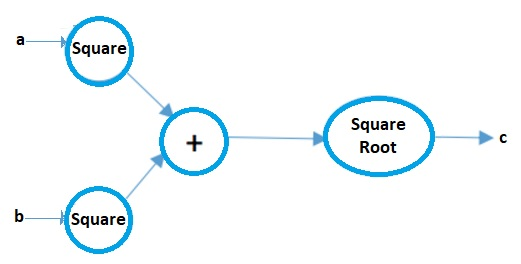

Now, a computational graph of logistic regression looks like:

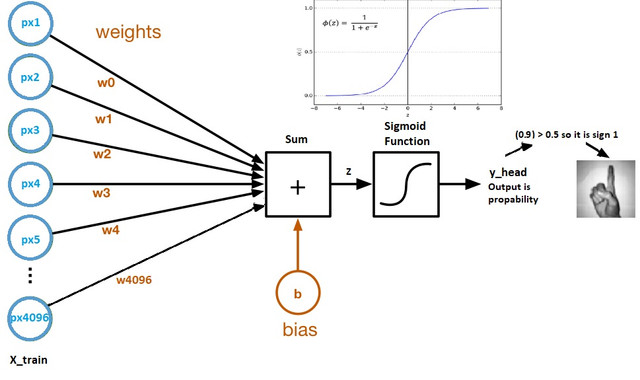

## Explanation of the Logistic Regression Computational Graph

Logistic regression is a binary classification algorithm used to predict the probability of a target variable belonging to a particular class. The computational graph in the image provides a visual representation of how logistic regression works.

---

### 1. Input Data (`X_train`)

- **`X_train`** represents the input data, which in this example consists of **4096 features** (labeled `px1`, `px2`, ..., `px4096`).
- Each feature in `X_train` corresponds to a pixel in an image (flattened into a single row), where **4096** represents the total number of pixels (e.g., for a 64x64 grayscale image).
- Each feature is a numeric value (pixel intensity) that is input into the model.

---

### 2. Weights (`w0`, `w1`, ..., `w4096`)

- Each input feature (`px1`, `px2`, ..., `px4096`) is associated with a weight (`w0`, `w1`, ..., `w4096`).
- These **weights** are parameters learned by the logistic regression model during training.
- Each weight indicates the importance or influence of a corresponding feature on the final prediction.

---

### 3. Bias (`b`)

- The **bias term `b`** is an additional parameter that allows the model to adjust the output independently of the input values.
- It essentially shifts the decision boundary of the model, enabling it to fit the data better.

---

### 4. Summation (`z`)

- The input data and weights are combined in a linear form:
  
  $$
  z = w_0 \cdot px1 + w_1 \cdot px2 + w_2 \cdot px3 + \dots + w_{4096} \cdot px4096 + b
  $$

- This summation computes the **weighted sum** of the input features, plus the bias.
- The result, `z`, is a single scalar value that represents the linear combination of inputs.

---

### 5. Sigmoid Activation Function

- After computing `z`, the value is passed through the **sigmoid function**, which is defined as:

  $$
  \sigma(z) = \frac{1}{1 + e^{-z}}
  $$

- The sigmoid function **squashes the output** into a range between 0 and 1, making it interpretable as a probability.
- This output, often denoted as **`y_hat`** (or the predicted probability), represents the probability that the input belongs to the positive class (e.g., sign language "1" in this case).

---

### 6. Output Probability (`y_head` or `ŷ`)

- The sigmoid function’s output, `ŷ` (or `y_head`), represents the **probability of the positive class**.
- For example, if `ŷ = 0.9`, it implies a 90% probability that the input belongs to class "1".

---

### 7. Thresholding and Prediction

- In binary classification, a threshold (typically 0.5) is applied to `ŷ` to make a final prediction:
  - If `ŷ > 0.5`, the prediction is class `1`.
  - If `ŷ <= 0.5`, the prediction is class `0`.
- In this example, `ŷ = 0.9`, which is greater than 0.5, so the model predicts the input is of class `1`.

---

### Summary of Steps

1. **Input Data**: Each pixel (feature) of the image is fed into the model.
2. **Weights and Bias**: The model applies learned weights and bias to each feature.
3. **Summation (`z`)**: Computes the weighted sum of all features.
4. **Sigmoid Activation**: Transforms `z` into a probability between 0 and 1.
5. **Thresholding**: Compares `ŷ` to 0.5 to make a binary prediction.

This computational graph demonstrates how logistic regression works in a structured way, transforming raw pixel data into a probabilistic prediction, ultimately used for classification.

## Why Use the Sigmoid Function in Logistic Regression?

The sigmoid function plays a crucial role in logistic regression, as it transforms the output of a linear equation into a probability, making it suitable for binary classification tasks. Here’s a detailed breakdown of why the sigmoid function is used:

---

### 1. Mapping Output to Probability

- Logistic regression is used for **binary classification**, where the goal is to predict the probability that an input belongs to a certain class (e.g., class `1` or class `0`).
- The sigmoid function **maps any real-valued number** (the output of the linear equation) into a range between **0 and 1**, which can be interpreted as a probability.
  
  $$
  \sigma(z) = \frac{1}{1 + e^{-z}}
  $$

- If the output of the linear equation `z` is very large (positive or negative), the sigmoid function will bring it within the probability range of `[0, 1]`, where:
  - Values close to 1 indicate a high probability of belonging to the positive class.
  - Values close to 0 indicate a low probability of belonging to the positive class.

---

### 2. Smooth and Differentiable

- The sigmoid function is **smooth and differentiable**, which means it has a continuous gradient.
- This smooth gradient is essential for **gradient-based optimization** algorithms, such as gradient descent, which are used to find optimal weights and bias values in logistic regression.
- The differentiable nature of the sigmoid function allows us to compute gradients, enabling efficient updates to the weights and bias during training.

---

### 3. Non-linear Transformation

- Logistic regression applies a **linear transformation** to the input features (using weights and bias), but a linear model alone cannot output probabilities.
- The sigmoid function introduces **non-linearity** to the model, allowing it to produce probabilities rather than unrestricted real numbers.
- This non-linearity is crucial for classification tasks, as it compresses the output of the linear combination into a bounded range, `[0, 1]`, which can be interpreted as a probability.

---

### 4. Decision Boundary

- By applying a threshold (typically 0.5) to the sigmoid output, we can classify the input as one of two classes:
  - If `ŷ > 0.5`, classify as class `1` (positive).
  - If `ŷ <= 0.5`, classify as class `0` (negative).
- The sigmoid function creates a **smooth decision boundary** that separates the two classes, allowing logistic regression to work well for linearly separable data.

---

### 5. Interpretability

- The output of the sigmoid function can be **directly interpreted as a probability**, making logistic regression a probabilistic model.
- For example, if `ŷ = 0.9`, we can interpret this as a 90% confidence that the input belongs to class `1`.
- This probabilistic interpretation is valuable in many applications, such as medical diagnosis or spam detection, where understanding the confidence of the prediction is essential.

---

### Summary: Benefits of Using the Sigmoid Function

- **Maps outputs to probabilities**: Outputs a value between 0 and 1, making it interpretable as a probability.
- **Smooth and differentiable**: Facilitates gradient-based optimization in training.
- **Non-linear transformation**: Enables logistic regression to output probabilities instead of raw linear values.
- **Enables decision boundary**: Allows thresholding to separate classes effectively.
- **Interpretability**: Makes the output directly understandable as the probability of belonging to a specific class.

In short, the sigmoid function is used in logistic regression to convert the linear output into a probability that can be thresholded for binary classification. This makes logistic regression a powerful yet simple model for classification tasks.

## Initializing Parameters

### Initializing Parameters in Logistic Regression

In logistic regression, our input consists of images with **4096 pixels each** (as given in `x_train`). Each pixel has an associated **weight** that indicates its influence on the final prediction. Before training the model, we need to initialize these weights and the bias term.

#### 1. Why Initialize Weights?

The first step in logistic regression is to **multiply each pixel's value by its corresponding weight** and then sum the results to get a linear combination of the input features. However, since the model hasn’t learned any patterns yet, the weights need to be initialized with some initial values. Proper weight initialization is crucial, as it sets the foundation for learning. Starting with poor values can lead to slower or suboptimal learning.

#### 2. Initial Values for Weights

For this example, we’ll initialize all weights to a small value of **0.01**. Initializing weights with small, non-zero values helps prevent the model from getting "stuck" with zero gradients and enables it to start learning effectively. (There are more advanced initialization techniques, which we’ll discuss in detail when covering Artificial Neural Networks (ANNs), but for now, setting weights to 0.01 will suffice.)

#### 3. Shape of the Weight Array

As we can see from the computational graph of logistic regression, there are **4096 weights** — one for each pixel in an image. Since each weight is applied to a single pixel, the weight array has a shape of **(4096, 1)**. This shape allows each weight to align with its corresponding pixel in the input data.

#### 4. Initializing the Bias

In addition to weights, we also initialize a **bias term (`b`)**. The bias term allows the model to shift the decision boundary independently of the input values, giving it more flexibility. For logistic regression, we typically initialize the bias to **0**.

---

### Code for Parameter Initialization

To keep the code modular and reusable, we’ll define a function to initialize these parameters. This function will be useful later when we expand into more complex models, such as Artificial Neural Networks (ANNs).

```python
def initialize_parameters(dim):
    """
    Initializes weights and bias for logistic regression.
    
    Arguments:
    dim -- size of the weight vector (number of features)
    
    Returns:
    w -- initialized weight vector of shape (dim, 1)
    b -- initialized bias, set to 0
    """
    w = np.full((dim, 1), 0.01)  # Initialize weights with 0.01
    b = 0                        # Initialize bias to 0
    return w, b

# Example usage
dim = 4096  # Number of pixels in each image
w, b = initialize_parameters(dim)
print("Shape of weights:", w.shape)
print("Bias:", b)
```

#### Explanation of the Code

- **Function Name**: `initialize_parameters`  
  This function is designed to initialize the weight vector (`w`) and the bias (`b`) for logistic regression. By using a function, we keep the initialization code modular and reusable for future applications.

- **Parameter (`dim`)**:  
  The function takes `dim` as an argument, which represents the number of features (or pixels) in each image. In our case, `dim = 4096`, since each image has 4096 pixels.

- **Weight Initialization**:  
  Inside the function, `np.full((dim, 1), 0.01)` creates a weight vector `w` with the specified shape `(dim, 1)`, where each element is set to the initial value **0.01**. This results in a weight vector with 4096 rows and 1 column, corresponding to each pixel. Initializing all weights with a small, non-zero value (0.01) provides a good starting point for learning and helps the model avoid issues that can arise if weights start at zero.

- **Bias Initialization**:  
  The bias `b` is initialized to **0**. Unlike weights, bias is a single scalar value that adjusts the model's output independently of the input features. Initializing it to zero is common practice in logistic regression, as it will be updated during training.

- **Returning Values**:  
  The function returns `w` and `b` as outputs, providing the initialized parameters to use in the model.

- **Example Usage**:  
  After defining the function, we call `initialize_parameters(4096)` to initialize weights and bias for images with 4096 pixels. The output shows:
  - `w` with a shape of `(4096, 1)`, meaning there’s a weight for each pixel.
  - `b` initialized to `0`.

This initialization setup allows the logistic regression model to start with appropriate initial values for training.

In [9]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)
    b = 0.0
    return w, b

### Forward Propagation in Logistic Regression

**Forward propagation** in logistic regression involves all the steps from processing the input pixels to calculating the cost (error) for a single training iteration. Let’s break down each step:

---

#### 1. Linear Combination (`z`)

The first step in forward propagation is to calculate a **linear combination** of the input features and their corresponding weights, plus the bias term. This is given by the equation:

$$
z = w^T x + b
$$

where:
- `x` is the input vector (flattened pixels of an image).
- `w` is the weight vector.
- `b` is the bias term.
- `w^T` represents the transpose of `w`, which allows us to perform matrix multiplication with `x` and get a scalar output.

Since we already have values for `x`, `w`, and `b` from the input data and parameter initialization, calculating `z` is straightforward.

---

#### 2. Sigmoid Activation Function

After calculating `z`, we pass it through the **sigmoid function** to convert it into a probability. The sigmoid function, defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

squashes the output to a value between **0 and 1**, which represents the predicted probability (`y_head`) of the input belonging to the positive class (e.g., class `1`). This probability, `y_head`, is our model’s prediction for the given input.

If you get confused by the steps, refer back to the computation graph for logistic regression. The sigmoid function is visually depicted there to help you understand how it transforms `z` into a probability.

---

#### 3. Loss (Error) Calculation

Next, we calculate the **loss (error)** for a single training example. The loss function measures how far off the prediction (`y_head`) is from the actual label `y`. In logistic regression, we use the **binary cross-entropy loss**:

$$
\text{Loss} = - \left( y \cdot \log(y\_head) + (1 - y) \cdot \log(1 - y\_head) \right)
$$

where:
- `y` is the true label (0 or 1) for the input.
- `y_head` is the predicted probability of class `1`.

This loss function penalizes incorrect predictions more heavily, making it ideal for binary classification tasks.

---

#### 4. Cost Function (Summing All Losses)

The **cost function** is the average of the loss values across all training examples. It is computed as:

$$
\text{Cost} = \frac{1}{m} \sum_{i=1}^{m} \text{Loss}(y_i, y\_head_i)
$$

where:
- `m` is the total number of training examples.
- `Loss(y_i, y_head_i)` is the loss for each individual example.

Minimizing this cost function during training will improve the model’s accuracy by adjusting the weights and bias to reduce prediction errors.

---

### Code for Forward Propagation

Let’s start by calculating `z`, then define a function for the sigmoid activation, which takes `z` as an input parameter and returns `y_head` (the probability).

```python
def sigmoid(z):
    """
    Computes the sigmoid of z.

    Arguments:
    z -- A scalar or numpy array of any size

    Returns:
    s -- sigmoid(z), output between 0 and 1
    """
    s = 1 / (1 + np.exp(-z))
    return s

# Example calculation of z
z = np.dot(w.T, x) + b  # w.T represents the transpose of w
y_head = sigmoid(z)     # y_head is the predicted probability
```

#### Explanation of the Code

- **Sigmoid Function**:  
  The `sigmoid` function calculates the sigmoid of `z`, which is a mathematical operation that maps any input to a value between 0 and 1. This output represents the probability (`y_head`) that the input belongs to the positive class. The sigmoid function is defined as:

  $$
  \sigma(z) = \frac{1}{1 + e^{-z}}
  $$
  In the code, `s = 1 / (1 + np.exp(-z))` implements this formula, where `np.exp(-z)` calculates the exponential of `-z` for each element in `z`.

- **Calculation of `z`**:  
  The variable `z` is calculated using the expression `np.dot(w.T, x) + b`. Here:
  - `w.T` is the transpose of the weight vector `w`. Transposing `w` (which has shape `(4096, 1)`) makes it compatible with `x` for matrix multiplication.
  - `np.dot(w.T, x)` performs the dot product between `w.T` and `x`, resulting in a scalar value `z` (since `x` is also a vector of shape `(4096, 1)`).
  - Adding `b` incorporates the bias term into the calculation, which helps adjust the model's decision boundary.

- **Predicted Probability (`y_head`)**:  
  After calculating `z`, we pass it into the `sigmoid` function to obtain `y_head`, the predicted probability that the input belongs to class `1`. This probability (`y_head`) will be used to calculate the loss and cost in the training process.

By organizing the code this way, we separate the calculation of `z` and the sigmoid function, which makes it modular and easier to understand. This modular approach will also make it easier to reuse the sigmoid function in future parts of the model.

In [10]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [11]:
y_head = sigmoid(0)
print(y_head)

0.5


### Understanding the Loss (Error) Function in Logistic Regression

Now that we have implemented the sigmoid function and calculated the predicted probability (`y_head`), let’s dive into the concept of the **loss (error) function** and its role in logistic regression.

---

#### 1. Purpose of the Loss Function

After making a prediction with `y_head`, we need a way to measure how accurate our prediction is. The **loss function** (or error function) helps us quantify the difference between the predicted probability (`y_head`) and the actual label (`y`) for a single training example.

For example:
- Suppose we input an image, calculate `z` (by multiplying each pixel value by its weight and adding the bias), and then pass `z` through the sigmoid function to get `y_head`.
- If `y_head = 0.9`, which is greater than 0.5, our model predicts that the image belongs to class `1` (positive class). This prediction looks correct on the surface, but we still need to confirm it.

#### 2. How the Loss Function Works

The loss function provides a way to check if our prediction (`y_head`) is accurate:
- The **log loss (or binary cross-entropy loss)** is used in logistic regression. Its mathematical expression is:

  $$
  \text{Loss} = - \left( y \cdot \log(y\_head) + (1 - y) \cdot \log(1 - y\_head) \right)
  $$

  where:
  - `y` is the true label (either `0` or `1`).
  - `y_head` is the predicted probability.

This formula penalizes incorrect predictions by assigning a higher loss value. If the prediction is correct, the loss is low; if it is incorrect, the loss becomes high.

#### 3. Example of the Loss Function

- **Correct Prediction**:  
  Suppose the actual label of the image is `y = 1` (the image belongs to class `1`), and our model’s prediction is `y_head = 1`. When we substitute `y` and `y_head` into the loss function, the result is `0`. This is because we made a correct prediction, so the loss is minimized.

- **Incorrect Prediction**:  
  If the model’s prediction is `y_head = 0` (indicating class `0`), but the true label is `y = 1`, the loss function results in a very large value (approaching infinity). This high loss indicates that the prediction is highly inaccurate.

The log loss function, therefore, discourages incorrect predictions by assigning higher penalty values to them.

---

#### 4. Cost Function (Summing All Losses)

The **cost function** in logistic regression is the average of the loss values across all training examples. It aggregates the individual losses for each training sample, providing an overall measure of the model’s accuracy on the dataset. The cost function is defined as:

$$
\text{Cost} = \frac{1}{m} \sum_{i=1}^{m} \text{Loss}(y_i, y\_head_i)
$$

where:
- `m` is the number of training examples.
- `Loss(y_i, y_head_i)` is the loss for each individual training example.

Minimizing this cost function through training allows the model to improve its predictions over time by adjusting the weights and bias.

---

### Code Implementation for Forward Propagation

Now that we understand the purpose of the loss and cost functions, let’s implement forward propagation. This involves calculating `z`, applying the sigmoid function to obtain `y_head`, and then calculating the loss.

```python
def forward_propagation(x, y, w, b):
    """
    Implements the forward propagation step, which includes
    calculating z, applying the sigmoid function, and computing the loss.

    Arguments:
    x -- Input data (flattened pixels of an image)
    y -- True label (0 or 1)
    w -- Weight vector of shape (4096, 1)
    b -- Bias term (scalar)

    Returns:
    y_head -- Predicted probability
    cost -- Cost function (average of the losses)
    """
    # Step 1: Calculate z (linear combination)
    z = np.dot(w.T, x) + b

    # Step 2: Apply sigmoid function to get predicted probability y_head
    y_head = sigmoid(z)

    # Step 3: Compute the loss for the single example
    loss = - (y * np.log(y_head) + (1 - y) * np.log(1 - y_head))

    return y_head, loss
```

#### Explanation of the Code

- **Function Name**: `forward_propagation`  
  This function performs the forward propagation steps, including calculating `z`, applying the sigmoid function to get the prediction (`y_head`), and calculating the loss for a single example.

- **Arguments**:
  - `x`: The input data (flattened pixel values of a single image).
  - `y`: The true label (either 0 or 1) for the input image.
  - `w`: The weight vector with a shape of `(4096, 1)`, where each weight corresponds to a pixel.
  - `b`: The bias term, which is a scalar value.

- **Calculation of `z`**:  
  The line `z = np.dot(w.T, x) + b` calculates the linear combination of inputs and weights, plus the bias term:
  - `np.dot(w.T, x)` computes the dot product between the transposed weight vector (`w.T`) and the input vector (`x`), resulting in a scalar value `z`.
  - Adding `b` incorporates the bias, adjusting the model’s prediction independently of the input values.

- **Predicted Probability (`y_head`)**:  
  `y_head = sigmoid(z)` passes `z` through the sigmoid function to convert it into a probability between 0 and 1. This probability (`y_head`) represents the model’s prediction that the input image belongs to class `1`.

- **Loss Calculation**:  
  `loss = - (y * np.log(y_head) + (1 - y) * np.log(1 - y_head))` computes the binary cross-entropy loss:
  - If `y` matches `y_head` closely, the loss will be small, indicating an accurate prediction.
  - If `y` and `y_head` differ significantly, the loss will be high, indicating a poor prediction.
  - This loss measures the error for a single training example.

By executing these steps, the `forward_propagation` function calculates the predicted probability and the associated error for a given input, setting the foundation for training the model by minimizing this loss.

In [12]:
def forward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z) # probabilistic 0-1
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1] # x_train.shape[1]  is for scaling
    return cost

## Optimization Algorithm with Gradient Descent

### Optimization Algorithm with Gradient Descent

Now that we understand the **cost** (or error) of our model, we need a way to **reduce the cost**. A high cost means our model is making incorrect predictions, so reducing the cost will help improve its accuracy. The method we use to minimize the cost function is called **gradient descent**.

---

#### 1. Why Gradient Descent?

In logistic regression, the cost depends on the model’s **weights** and **bias**. To minimize the cost, we need to adjust these parameters so that the model learns the optimal values. Gradient descent is an iterative optimization technique that adjusts the weights and bias in the direction that decreases the cost.

---

#### 2. Gradient Descent: An Example

Let’s walk through a simple example:

- Suppose we start with \( w = 5 \) and \( b = 0 \) (ignoring bias for simplicity).
- After one forward propagation step, the **cost** (error) is calculated to be \( 1.5 \).
  
  This initial value of \( w \) does not minimize the cost. As shown in the example graph (red line), we’re not at the lowest point. We need to move \( w \) toward a minimum cost.

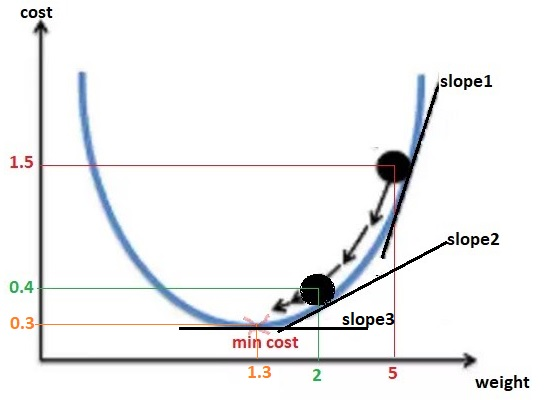

- **Updating the Weight**:
  
  We update \( w \) using the following rule:
  
  $$
  w := w - \text{step}
  $$

  Here, the **step** is determined by the **slope** (derivative) of the cost function with respect to \( w \) at the current point.

- **Finding the Minimum Point Using the Slope**:
  
  - Suppose the slope at this point (`slope1`) is \( 3 \). We update \( w \) using \( w := w - \text{slope1} \), so \( w \) becomes \( 2 \).
  - Now, after updating \( w \) to \( 2 \) and performing another forward propagation, we find that the cost has decreased to \( 0.4 \). This means we’re moving in the right direction, as the cost is decreasing.
  
- **Repeating the Steps**:
  
  We continue this process:
  
  - The next slope (`slope2`) is \( 0.7 \), and updating \( w := w - \text{slope2} \) gives \( w = 1.3 \).
  - After another forward propagation, the cost decreases to \( 0.3 \).
  
  At this point, our cost has decreased further, and we are getting closer to the minimum.

- **Reaching the Minimum**:
  
  When the slope becomes very small (e.g., `slope3 = 0.01`), updating \( w \) does not significantly change its value. This indicates that we’ve reached or are close to the minimum cost, as the weight no longer needs significant adjustment.

---

#### 3. Understanding the Slope and Direction

The **slope** (or derivative) of the cost function at a given point indicates both:
- The **step size** for the update.
- The **direction** to move in (positive or negative).

This way, the slope tells us both how far and in which direction to adjust \( w \) to reach a lower cost. The derivative ensures that we move toward the minimum rather than increasing the cost.

---

#### 4. The Update Equation

The update equation for gradient descent is given by:

$$
w := w - \alpha \frac{\partial J}{\partial w}
$$

where:
- $ J $ is the cost function.
- $\frac{\partial J}{\partial w}$ is the derivative of the cost function with respect to \( w \).
- $ \alpha $ is the **learning rate**, which controls how large each update step is.

The same update rule applies to the **bias** term, using its own derivative.

---

#### 5. Learning Rate (α)

The **learning rate** $\alpha $ is a critical parameter in gradient descent. It determines how fast the model learns. There is a tradeoff:
- A **small learning rate** makes the model learn slowly, potentially requiring many iterations to reach the minimum.
- A **large learning rate** can make the model converge quickly, but it risks overshooting the minimum and may fail to find it altogether.

In our example, we might set $\alpha = 1 $ to keep the updates manageable. Choosing an appropriate learning rate is crucial, as it directly impacts the model's ability to learn.

---

#### 6. Forward and Backward Propagation

Now we understand the two main steps:
- **Forward Propagation**: From weights and bias to the cost, where we calculate predictions and measure error.
- **Backward Propagation**: From cost to weights and bias, where we update these parameters using gradient descent.

Together, forward and backward propagation enable the model to improve over time.

---

#### Derivative of the Cost Function with Respect to Weights and Bias

To calculate the derivative of the cost function, we can use either:
1. Google how to take the derivative of the log loss function.
2. Look up the derivative directly.

The derivatives are:

$$
\frac{\partial J}{\partial w} = \frac{1}{m} x (y\_head - y)^T
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (y\_head - y)
$$

where:
- \( y \) is the true label.
- \( y\_head \) is the predicted probability.
- \( m \) is the number of training examples.

Using these derivatives, we can apply gradient descent to update \( w \) and \( b \) in a direction that minimizes the cost.

In [13]:
def forward_backward_propagation(w, b, x_train, y_train):
    # forward propagation
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1] # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1] # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return cost, gradients

In [14]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [15]:
# prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Putting everything together

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


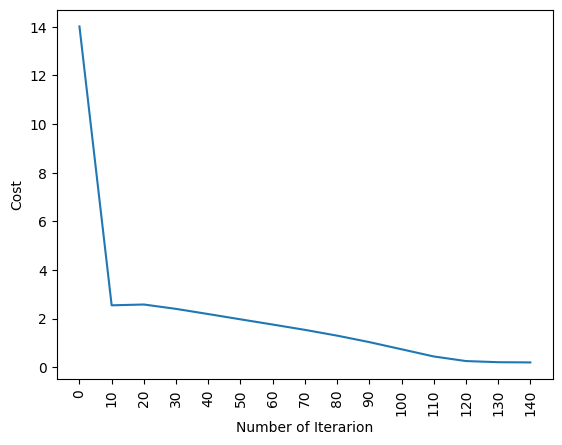

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [16]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

## SkLearn

We already implemented everything from scratch, but we can also make use of sklearn library and implement it easily.

In [17]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter=150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))

print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


The results are better because, in the sklearn code, the logisitc regression method uses a lot of different features that we didn't specifed in the previous part.

# Artificial Neural Networks (ANNs)



An Artificial Neural Network (ANN), often called a **Deep Neural Network (DNN)** or simply **Deep Learning**, is an extension of logistic regression. It builds on the basic idea of logistic regression by stacking multiple layers of computation to enable more complex learning.

---

#### 1. What is a Neural Network?

A **neural network** can be seen as a series of logistic regression models layered together. In logistic regression, we have only **input** and **output layers**. However, in a neural network, we add at least one **hidden layer** between the input and output layers.

In a neural network:
- The **input layer** takes in the features of the data (e.g., pixels of an image).
- The **output layer** provides the final prediction (e.g., classifying an image).
- **Hidden layers** (one or more) are intermediate layers where the model learns more abstract representations.

---

#### 2. What Makes a Network "Deep"?

The term **"deep"** refers to the number of hidden layers in a neural network. Historically, networks with just a few hidden layers (two or three) were considered deep. However, as computational power has increased, neural networks with dozens or even hundreds of hidden layers have become feasible.

- For example, 20 layers was once considered very deep. Today, commercial networks like those developed by Andrew Ng have **152 layers** or even more.
- Some companies have even experimented with networks containing **thousands of layers**.

The depth of a neural network is a relative term, and "deep" simply means a network with multiple hidden layers.

---

#### 3. Why Are They Called "Hidden" Layers?

The layers between the input and output are called **hidden layers** because they do not directly interact with the input data or the final output. Instead, they receive inputs from the previous layer and pass their outputs to the next layer. The model learns patterns in these hidden layers that aren't visible to the input or output directly.

- For example, if you have an input layer, one hidden layer, and an output layer, your network is considered to have **2 layers** (one hidden layer and one output layer).
- **Note**: When counting layers in a neural network, the input layer is typically not counted.

---

#### 4. Structure of a Simple 2-Layer Neural Network

Let’s take a look at a **2-layer neural network** with one hidden layer.

- **Input Layer**: This layer takes in the raw input data.
- **Hidden Layer**: This intermediate layer consists of **nodes** (or **neurons**), which process the data from the input layer. In this example, our hidden layer has **3 nodes**. (Choosing the number of nodes is arbitrary and is considered a **hyperparameter**.)
- **Output Layer**: This layer produces the final output (e.g., probability of classification).

---

#### 5. Activation Functions and Non-Linearity

In neural networks, each layer has an **activation function** that introduces **non-linearity** to the model. Non-linearity allows the network to learn complex patterns beyond simple linear relationships. 

- In **logistic regression**, we use the **sigmoid activation function** in the output layer to convert values to probabilities.
- In **hidden layers of neural networks**, the **tanh activation function** is commonly used. 

The **tanh function** is preferred in hidden layers because:
- It **centers the output around zero**, which helps the next layer learn more effectively.
- It enhances the non-linearity of the model, allowing it to learn better and capture more complex relationships.

The tanh function is defined as:

$$
\text{tanh}(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
$$

---

#### 6. Comparing Logistic Regression and a 2-Layer Neural Network

In **logistic regression**, we have a direct flow: `input => output`. The input features are transformed directly into an output.

In a **2-layer neural network**, we have an additional hidden layer:
- The data flows from `input => hidden layer => output`.
- You can think of the hidden layer as the **output** of the first part and the **input** for the second part.

In essence:
- Part 1 (input to hidden layer) and Part 2 (hidden layer to output) each function similarly to logistic regression. The only difference is that now we have an activation function (e.g., tanh) in the hidden layer, which adds non-linearity and enhances the model's learning capacity.

---

#### 7. Hyperparameters in Neural Networks

In neural networks, several parameters are not learned during training but are instead set manually. These are known as **hyperparameters**. Examples include:
- **Learning Rate**: Controls the size of the steps taken during gradient descent.
- **Number of Nodes**: Specifies how many nodes (or neurons) are in each hidden layer.
- **Number of Layers**: Determines the depth of the network.

Choosing the right values for these hyperparameters is crucial for the model’s performance, and they are typically fine-tuned based on the problem.

---

In summary, an artificial neural network is like stacking multiple logistic regression models together with hidden layers and non-linear activation functions. The presence of hidden layers and non-linear activations allows neural networks to learn complex patterns and make more accurate predictions for complex data.

### Building a 2-Layer Neural Network

To construct a 2-layer neural network, we’ll go through the key steps:
1. **Define the size of each layer and initialize weights and biases**
2. **Perform forward propagation**
3. **Calculate the loss and cost functions**
4. **Apply backward propagation**
5. **Update parameters**
6. **Make predictions with the learned weights and biases**
7. **Create the complete model**

---

#### 1. Size of Layers and Initializing Parameters (Weights and Bias)

In this example, our input dataset `x_train` contains **348 samples** with multiple features per sample. Here’s how the data flows through the network:

- **Input Layer**: Each input sample is represented by $x(348)$, which is the input data for the 348 samples.
  
- **First Hidden Layer**:
  - **Linear Combination**: $z^{[1]}(348) = W^{[1]} x(348) + b^{[1]}(348)$
  - **Activation**: $a^{[1]}(348) = \text{tanh}(z^{[1]}(348))$
  
- **Output Layer**:
  - **Linear Combination**: $z^{[2]}(348) = W^{[2]} a^{[1]}(348) + b^{[2]}(348)$
  - **Activation (Sigmoid)**: $\hat{y}(348) = a^{[2]}(348) = \sigma(z^{[2]}(348))$

The final output, $\hat{y}(348)$, is the network’s prediction for each sample in `x_train`.

---

#### 2. Initializing Parameters for Weights and Bias

In logistic regression, we initialize weights to **0.01** and bias to **0**. However, for neural networks, we use a different strategy for initialization:

- **Random Initialization for Weights**:
  - If weights are initialized to zero, each neuron in the hidden layer will compute the same values, leading to redundant learning where neurons perform identical computations.
  - By initializing weights randomly, each neuron receives a unique starting point, allowing it to learn distinct features during training.
  
- **Small Initial Values**:
  - Initial weights are chosen to be small. Large initial weights can lead to high values in the hidden layer, especially when passed through the **tanh** activation function. High values in the `tanh` function make the gradient close to zero, which slows down the optimization process.
  - Random, small initial weights ensure that gradients are not too small or too large, leading to more efficient training.

- **Bias Initialization**:
  - The bias terms can be initialized to zero without impacting the network’s ability to learn effectively, as they’ll adjust during training.

---

#### 3. Forward Propagation

In forward propagation, we pass the data through the network to compute the output:

1. **First Hidden Layer**:
   - Compute $z^{[1]}$ using the input data and initial parameters:  
     $$ z^{[1]} = W^{[1]} x + b^{[1]} $$
   - Apply the **tanh activation** function:  
     $$ a^{[1]} = \text{tanh}(z^{[1]}) $$
  
2. **Output Layer**:
   - Compute $z^{[2]}$ using the output of the first hidden layer:  
     $$ z^{[2]} = W^{[2]} a^{[1]} + b^{[2]} $$
   - Apply the **sigmoid activation** function to get the prediction $\hat{y}$:  
     $$ \hat{y} = a^{[2]} = \sigma(z^{[2]}) $$

The final output $\hat{y}$ is the probability that each sample belongs to the positive class.

---

#### 4. Loss Function and Cost Function

After obtaining the predictions $\hat{y}$, we calculate the **loss function** for each sample to quantify the error between predicted and actual values. The **binary cross-entropy loss** is commonly used for binary classification tasks, as it penalizes incorrect predictions.

The **cost function** is the average loss over all samples in the training set:
$$
\text{Cost} = \frac{1}{m} \sum_{i=1}^{m} \text{Loss}(y_i, \hat{y}_i)
$$
where $m$ is the number of samples in the dataset.

---

#### 5. Backward Propagation

Backward propagation calculates the **gradients** of the cost function with respect to each weight and bias parameter. These gradients indicate the direction in which each parameter should be adjusted to minimize the cost.

1. **Calculate the gradient of the cost with respect to each weight and bias**.
2. Use these gradients to update the weights and biases, ensuring that the model learns from the error in each training step.

---

#### 6. Update Parameters

Using the gradients calculated in backward propagation, we **update the parameters** (weights and biases) to reduce the cost. The update rule for each parameter uses **gradient descent**:

$$
W := W - \alpha \frac{\partial J}{\partial W}
$$
$$
b := b - \alpha \frac{\partial J}{\partial b}
$$

where $\alpha$ is the **learning rate**, which determines the step size for each update. Choosing the right learning rate is critical for ensuring efficient training.

---

#### 7. Prediction with Learned Parameters

After training the model and updating parameters, we can use the final values of **weights** and **biases** to make predictions on new data. This involves:
1. Performing forward propagation with the learned parameters.
2. Applying a threshold to classify each sample based on the output probability $\hat{y}$.

---

#### 8. Creating the Complete Model

Combining all the steps, we build a **complete 2-layer neural network model**:
1. Initialize the size of layers, weights, and biases.
2. Perform forward propagation to calculate predictions.
3. Compute the cost using the loss function.
4. Apply backward propagation to compute gradients.
5. Update parameters using gradient descent.
6. Use the model for predictions once trained.

This structure enables the neural network to learn complex patterns and make accurate predictions by iteratively adjusting its parameters to minimize the cost.

### Size of Layers and Initializing parameters weights and bias

We initialize weights randomly this time, 

In [18]:
# initialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1, "bias1": np.zeros((3,1)), 
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1, "bias2": np.zeros((y_train.shape[0],1))}
    
    return parameters

### Explanation of `initialize_parameters_and_layer_sizes_NN` Function

This function, `initialize_parameters_and_layer_sizes_NN`, initializes the weights and biases for a 2-layer neural network with one hidden layer.

#### Code
```python
# initialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {
        "weight1": np.random.randn(3, x_train.shape[0]) * 0.1,
        "bias1": np.zeros((3, 1)),
        "weight2": np.random.randn(y_train.shape[0], 3) * 0.1,
        "bias2": np.zeros((y_train.shape[0], 1))
    }
    return parameters
```

#### Detailed Breakdown

1. **Function Purpose**
   - The function `initialize_parameters_and_layer_sizes_NN` initializes weights and biases for a neural network with one hidden layer and defines layer sizes based on the input (`x_train`) and output (`y_train`) data shapes.
   - This setup is typical for a **2-layer neural network** (input layer → hidden layer → output layer).

2. **Arguments: `x_train` and `y_train`**
   - `x_train`: Training data (input features). `x_train.shape[0]` gives the number of features per training example.
   - `y_train`: Target output (labels), where `y_train.shape[0]` provides the number of output classes.

3. **Initializing Parameters in the `parameters` Dictionary**
   - The `parameters` dictionary stores weights and biases for each layer in the neural network.

   #### Layer 1 (Hidden Layer)
   - **`"weight1"`**: The weight matrix for the hidden layer, initialized with small random values.
     - `np.random.randn(3, x_train.shape[0])` generates a matrix of shape `(3, x_train.shape[0])`, where `3` is the number of neurons in the hidden layer.
     - The values are scaled by `0.1` to keep initial weights small, aiding efficient training.
     - Example: If `x_train` has 5 features, `weight1` would have shape `(3, 5)`, so each of the 3 hidden neurons has a weight for each of the 5 features.

   - **`"bias1"`**: The bias vector for the hidden layer, initialized as zeros.
     - `np.zeros((3, 1))` creates a column vector of zeros with shape `(3, 1)`, assigning each neuron in the hidden layer its own bias term.

   #### Layer 2 (Output Layer)
   - **`"weight2"`**: The weight matrix for the output layer, also initialized with small random values.
     - `np.random.randn(y_train.shape[0], 3)` generates a matrix of shape `(y_train.shape[0], 3)`, where `y_train.shape[0]` is the number of output classes, and `3` is the number of neurons in the hidden layer.
     - Example: If `y_train` has 2 output classes, `weight2` will have shape `(2, 3)`, connecting each output neuron to each of the 3 neurons in the hidden layer.

   - **`"bias2"`**: The bias vector for the output layer, initialized as zeros.
     - `np.zeros((y_train.shape[0], 1))` creates a column vector of zeros with shape `(y_train.shape[0], 1)`.

4. **Return Statement**
   - `return parameters`: Returns the dictionary `parameters`, which contains the initialized weights and biases for both layers. This dictionary is used during forward and backward propagation in the neural network.


### Forward Propagation

Here we use $\tanh$ function

In [19]:
def forward_propagation_NN(x_train, parameters):
    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    
    return A2, cache

### Explanation of `forward_propagation_NN` Function

The `forward_propagation_NN` function performs the forward propagation step in a 2-layer neural network, taking `x_train` and initialized `parameters` as input. It calculates the activations for the hidden and output layers and stores intermediate values for later use in backpropagation.

#### Detailed Breakdown

1. **Input Parameters**:
   - `x_train`: The input data for training, where each column represents a training example, and each row represents a feature.
   - `parameters`: A dictionary containing the initialized weights and biases:
     - `"weight1"` and `"bias1"` for the hidden layer.
     - `"weight2"` and `"bias2"` for the output layer.

2. **Hidden Layer Computation**:
   - **Linear Transformation** (`Z1`): 
     - `Z1` is computed by taking the dot product of the weights for the hidden layer (`"weight1"`) and the input data (`x_train`), then adding the hidden layer bias (`"bias1"`).
     - `Z1` represents the weighted input for each neuron in the hidden layer before applying the activation function.
   
   - **Activation Function** (`A1`):
     - The `tanh` activation function is applied to `Z1` to get `A1`, which is the activated output of the hidden layer neurons.
     - `A1` introduces non-linearity, enabling the model to capture complex relationships.

3. **Output Layer Computation**:
   - **Linear Transformation** (`Z2`): 
     - `Z2` is computed by taking the dot product of the weights for the output layer (`"weight2"`) and the activated outputs from the hidden layer (`A1`), then adding the output layer bias (`"bias2"`).
     - `Z2` is the weighted input to the output layer neurons before applying the activation function.
   
   - **Activation Function** (`A2`):
     - The `sigmoid` activation function is applied to `Z2`, producing `A2`, the final output of the neural network.
     - `A2` is the predicted probability for each training example and is typically between 0 and 1 due to the sigmoid function, which is useful for binary classification.

4. **Caching Intermediate Values**:
   - The function creates a dictionary called `cache` to store intermediate values (`Z1`, `A1`, `Z2`, `A2`) needed for backpropagation.
   - **Cache**:
     - `"Z1"` and `"A1"` are the weighted input and activated output for the hidden layer.
     - `"Z2"` and `"A2"` are the weighted input and activated output for the output layer.

5. **Return Values**:
   - `A2`: The final output of the neural network, which represents the predicted probability for each training example.
   - `cache`: A dictionary containing `Z1`, `A1`, `Z2`, and `A2`, to be used in the backpropagation step for calculating gradients.



### Loss Function and Cost Function

$$ J(\theta) = -\sum_i y_i \ln (\hat{y_i})$$

In [20]:
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

### Explanation of `compute_cost_NN` Function

The `compute_cost_NN` function calculates the cost of the predictions generated by the neural network, using a binary cross-entropy cost function. This cost represents the error between the predicted values (`A2`) and the actual labels (`Y`) and is used to guide the optimization process in training.

#### Detailed Breakdown

1. **Input Parameters**:
   - `A2`: The output from the neural network's forward propagation step, representing the predicted probabilities for each example.
   - `Y`: The true labels for each example in the dataset, where each element is either 0 or 1.
   - `parameters`: This parameter is present here to maintain consistency with other functions, though it’s not used in the computation of the cost.

2. **Computing Logarithmic Probabilities (`logprobs`)**:
   - The binary cross-entropy cost function includes the term `Y * log(A2)`, which penalizes large differences between the predicted probabilities and the true labels.
   - `np.log(A2)` calculates the logarithm of each predicted probability.
   - `np.multiply(np.log(A2), Y)` performs element-wise multiplication of `Y` and `np.log(A2)`, giving the correct log probability contribution for each sample based on its true label.
   - This step effectively applies the penalty where `Y` is 1, as only the terms corresponding to the true class contribute to the cost in binary classification.

3. **Calculating the Cost (`cost`)**:
   - The `cost` is computed by taking the negative sum of `logprobs` and dividing by the number of examples, `Y.shape[1]`, to get the average cost across all examples.
   - The negative sign ensures that the cost is positive, as the logarithmic probabilities are negative for probabilities less than 1.
   - The formula for `cost` is effectively the binary cross-entropy loss averaged across the dataset.

4. **Return Value**:
   - The function returns `cost`, a scalar value representing the average error in the network's predictions. A lower cost indicates better performance by the neural network on the given dataset.

### Backward Propagation

It basically means derivative

In [21]:
def backward_propagation_NN(parameters, cache, X,Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1, "dbias1": db1, "dweight2": dW2, "dbias2": db2}

    return grads

### Explanation of `backward_propagation_NN` Function

The `backward_propagation_NN` function computes the gradients of the cost function with respect to the weights and biases of a 2-layer neural network. These gradients are used to update the weights and biases during training, allowing the network to minimize the cost and improve predictions.

#### Detailed Breakdown

1. **Input Parameters**:
   - `parameters`: A dictionary containing the current weights and biases for each layer of the network:
     - `"weight1"` and `"bias1"` for the hidden layer.
     - `"weight2"` and `"bias2"` for the output layer.
   - `cache`: A dictionary of intermediate values (`Z1`, `A1`, `Z2`, `A2`) from the forward propagation step, which are required for calculating gradients.
   - `X`: The input data, where each column represents a training example.
   - `Y`: The true labels corresponding to `X`.

2. **Gradients for Output Layer (Layer 2)**:
   - **Error Term (`dZ2`)**:
     - `dZ2` represents the gradient of the cost with respect to `Z2`, the weighted input to the output layer.
     - `dZ2` is calculated as the difference between the predicted output (`cache["A2"]`) and the actual output (`Y`). This difference measures the error in the output layer.
   
   - **Gradient of Weight (`dW2`)**:
     - `dW2` is the gradient of the cost with respect to the weights of the output layer.
     - It is calculated by taking the dot product of `dZ2` and the transpose of the activated output from the hidden layer (`cache["A1"].T`), and dividing by the number of examples (`X.shape[1]`).
     - This step averages the gradient across all training examples.
   
   - **Gradient of Bias (`db2`)**:
     - `db2` is the gradient of the cost with respect to the bias of the output layer.
     - It is computed by summing `dZ2` across all training examples (axis=1) and keeping the dimension consistent with the bias term (`keepdims=True`), then dividing by the number of examples.
     - This gives the average bias gradient across all examples.

3. **Gradients for Hidden Layer (Layer 1)**:
   - **Error Term (`dZ1`)**:
     - `dZ1` is the gradient of the cost with respect to `Z1`, the weighted input to the hidden layer.
     - It is calculated by taking the dot product of the transpose of `weight2` and `dZ2`, then multiplying element-wise by the derivative of the `tanh` activation function applied to `Z1`.
     - The derivative of `tanh(Z1)` is `1 - A1^2`, where `A1` is the activation output from the hidden layer. This derivative adjusts `dZ1` to account for the non-linear activation.
   
   - **Gradient of Weight (`dW1`)**:
     - `dW1` is the gradient of the cost with respect to the weights of the hidden layer.
     - It is computed by taking the dot product of `dZ1` and the transpose of `X`, then dividing by the number of examples to get the average gradient.
   
   - **Gradient of Bias (`db1`)**:
     - `db1` is the gradient of the cost with respect to the bias of the hidden layer.
     - It is calculated by summing `dZ1` across all training examples, keeping dimensions consistent with the bias term, and dividing by the number of examples.

4. **Storing Gradients in `grads` Dictionary**:
   - The gradients for weights and biases in both layers are stored in a dictionary called `grads`:
     - `"dweight1"` and `"dbias1"` store the gradients for the hidden layer.
     - `"dweight2"` and `"dbias2"` store the gradients for the output layer.

5. **Return Value**:
   - The function returns `grads`, which contains the calculated gradients needed to update the weights and biases of the network during the training process.

### Update Parameters

In [22]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
        
    
    return parameters

### Explanation of `update_parameters_NN` Function

The `update_parameters_NN` function updates the weights and biases of a 2-layer neural network using the gradients calculated from backpropagation. This step is essential for training the neural network, as it adjusts the parameters to reduce the cost.

#### Detailed Breakdown

1. **Input Parameters**:
   - `parameters`: A dictionary containing the current weights and biases of the network:
     - `"weight1"` and `"bias1"` for the hidden layer.
     - `"weight2"` and `"bias2"` for the output layer.
   - `grads`: A dictionary containing the gradients for each parameter, calculated during backpropagation:
     - `"dweight1"` and `"dbias1"` are the gradients for the hidden layer's weights and biases.
     - `"dweight2"` and `"dbias2"` are the gradients for the output layer's weights and biases.
   - `learning_rate`: A hyperparameter that controls the size of the update step. A small learning rate results in gradual updates, while a larger learning rate results in more significant changes to the parameters.

2. **Updating Parameters for Each Layer**:
   - The function updates the weights and biases by subtracting the product of the learning rate and the respective gradient from the current values of each parameter. This moves the parameters in the direction that reduces the cost.

   #### Layer 1 (Hidden Layer)
   - **`"weight1"`**:
     - The updated weight for the hidden layer is calculated as:
       $$ \text{weight1} := \text{weight1} - \text{learning\_rate} \times \text{dweight1} $$
     - This updates `"weight1"` based on its gradient (`dweight1`) scaled by the learning rate.
   - **`"bias1"`**:
     - The updated bias for the hidden layer is calculated as:
       $$ \text{bias1} := \text{bias1} - \text{learning\_rate} \times \text{dbias1} $$
     - This updates `"bias1"` based on its gradient (`dbias1`) scaled by the learning rate.

#### Layer 2 (Output Layer)
   - **`"weight2"`**:
     - The updated weight for the output layer is calculated as:
       $$ \text{weight2} := \text{weight2} - \text{learning\_rate} \times \text{dweight2} $$
     - This updates `"weight2"` based on its gradient (`dweight2`) scaled by the learning rate.
   - **`"bias2"`**:
     - The updated bias for the output layer is calculated as:
       $$ \text{bias2} := \text{bias2} - \text{learning\_rate} \times \text{dbias2} $$
     - This updates `"bias2"` based on its gradient (`dbias2`) scaled by the learning rate.

3. **Return Value**:
   - The function returns an updated `parameters` dictionary, which contains the new values for `"weight1"`, `"bias1"`, `"weight2"`, and `"bias2"` after applying the gradient descent step. These updated parameters are used in the next forward propagation pass to improve the model's predictions.

### Prediction with Learnt parameters weight and bias

In [23]:
# prediction

def predict_NN(parameters,x_test):
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

### Explanation of `predict_NN` Function

The `predict_NN` function makes predictions for a given test dataset (`x_test`) using the trained parameters of a 2-layer neural network. It performs forward propagation on the test data to compute predictions, then applies a threshold to classify each example.

#### Detailed Breakdown

1. **Input Parameters**:
   - `parameters`: A dictionary containing the trained weights and biases for each layer of the network.
   - `x_test`: The input data for testing, where each column represents a test example.

2. **Forward Propagation**:
   - The function calls `forward_propagation_NN` with `x_test` and `parameters` to compute the network’s output (`A2`) for each test example.
   - `A2`: The output matrix from the forward propagation step, representing the predicted probability for each test example.
   - `cache`: A dictionary containing intermediate values from forward propagation, though it is not used further in this function.

3. **Initialize Prediction Array (`Y_prediction`)**:
   - `Y_prediction`: An array initialized with zeros and shaped as `(1, x_test.shape[1])`, where each entry will store the predicted class (0 or 1) for the corresponding test example.
   - The shape `(1, x_test.shape[1])` matches the number of examples in `x_test`.

4. **Applying the Threshold for Classification**:
   - The function iterates over each element in `A2`, applying a threshold of 0.5 to determine the predicted class:
     - If `A2[0, i] <= 0.5`, the predicted class is set to `0` (indicating the example belongs to class 0).
     - If `A2[0, i] > 0.5`, the predicted class is set to `1` (indicating the example belongs to class 1).
   - This thresholding operation turns the probability values in `A2` into binary class predictions in `Y_prediction`, which is useful for binary classification tasks.

5. **Return Value**:
   - The function returns `Y_prediction`, a binary array where each element is either `0` or `1`, representing the predicted class for each example in `x_test`. These predictions can then be compared with the true labels to evaluate model performance.

### Create Model

Cost after iteration 0: 0.354387


Cost after iteration 100: 0.348204
Cost after iteration 200: 0.342312
Cost after iteration 300: 0.330339
Cost after iteration 400: 0.294135
Cost after iteration 500: 0.250912
Cost after iteration 600: 0.208498
Cost after iteration 700: 0.166080
Cost after iteration 800: 0.136636
Cost after iteration 900: 0.115021
Cost after iteration 1000: 0.099147
Cost after iteration 1100: 0.087170
Cost after iteration 1200: 0.077756
Cost after iteration 1300: 0.070096
Cost after iteration 1400: 0.063710
Cost after iteration 1500: 0.058208
Cost after iteration 1600: 0.053233
Cost after iteration 1700: 0.048547
Cost after iteration 1800: 0.044186
Cost after iteration 1900: 0.040343
Cost after iteration 2000: 0.037068
Cost after iteration 2100: 0.034246
Cost after iteration 2200: 0.031722
Cost after iteration 2300: 0.029330
Cost after iteration 2400: 0.026921


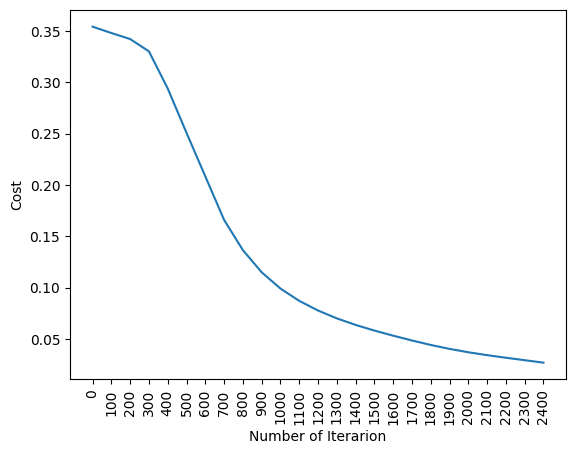

train accuracy: 99.71264367816092 %
test accuracy: 93.54838709677419 %


In [24]:
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

### Explanation of `two_layer_neural_network` Function

The `two_layer_neural_network` function trains a 2-layer neural network on the given training data (`x_train`, `y_train`), then evaluates the network's performance on both the training and test datasets (`x_test`, `y_test`). It performs forward and backward propagation, updates parameters iteratively, and outputs the trained parameters along with the accuracy on training and test sets.

#### Detailed Breakdown

1. **Input Parameters**:
   - `x_train`, `y_train`: Training data and labels.
   - `x_test`, `y_test`: Test data and labels.
   - `num_iterations`: The number of training iterations (i.e., the number of times the network parameters are updated).

2. **Initialization of Variables**:
   - `cost_list`: An empty list to store the cost value after every 100 iterations, used for tracking how the cost decreases over time.
   - `index_list`: An empty list to store the iteration indices, used for plotting the cost curve.

3. **Initialize Parameters and Layer Sizes**:
   - The function calls `initialize_parameters_and_layer_sizes_NN` to initialize the weights and biases for each layer based on `x_train` and `y_train`. These parameters are stored in a dictionary called `parameters`.

4. **Training Loop (Iterations)**:
   - The function iterates `num_iterations` times to train the network. Each iteration includes the following steps:

     - **Forward Propagation**:
       - Calls `forward_propagation_NN` with `x_train` and `parameters` to compute the output (`A2`) and intermediate values (`cache`).
       - `A2` represents the predicted probabilities for each training example, while `cache` stores intermediate values for use in backpropagation.

     - **Compute Cost**:
       - Calls `compute_cost_NN` with `A2`, `y_train`, and `parameters` to calculate the cost, which represents the error between predictions and true labels.
       - The cost guides the training by measuring how well the network is performing.

     - **Backward Propagation**:
       - Calls `backward_propagation_NN` with `parameters`, `cache`, `x_train`, and `y_train` to compute the gradients (`grads`) of the cost with respect to each parameter.
       - These gradients are used to update the weights and biases to reduce the cost in subsequent iterations.

     - **Update Parameters**:
       - Calls `update_parameters_NN` with `parameters` and `grads` to update the weights and biases by taking a step in the direction that reduces the cost.
       - The updated parameters are stored back in `parameters` for use in the next iteration.

     - **Store and Print Cost Every 100 Iterations**:
       - Every 100 iterations, the current cost is appended to `cost_list`, and the iteration index is added to `index_list`.
       - The cost value is printed to monitor progress and observe how the cost decreases over time.

5. **Plotting the Cost Curve**:
   - After the training loop, the function plots `cost_list` vs. `index_list` to show the cost reduction over time.
   - The x-axis shows the iteration number, and the y-axis shows the cost, providing a visual of the network’s learning progress.

6. **Prediction on Test and Training Data**:
   - Calls `predict_NN` with `parameters` and `x_test` to get predictions (`y_prediction_test`) on the test data.
   - Calls `predict_NN` with `parameters` and `x_train` to get predictions (`y_prediction_train`) on the training data.

7. **Calculate and Print Training and Test Accuracy**:
   - Calculates the accuracy on both the training and test datasets by comparing the predictions to the true labels.
   - Accuracy is calculated as \( 100 - \text{mean absolute error} \times 100 \), which gives the percentage of correctly classified examples.
   - Prints the training and test accuracy to evaluate the performance of the trained model on both datasets.

8. **Return Value**:
   - Returns the final `parameters` dictionary, which contains the trained weights and biases. These can be used to make predictions on new data or for further analysis.



**What Happens if number of hidden layer increase?**

## L Layer Neural Network

With more layers a neural network can detect more features and can learn more and more complex functions. For example, first hidden layer learns the edges or basic shapes, when number of layers increase, it start to learn convex shapes or characterstic features of fingers.

We will work with 2 hidden layers with 8 and 4 nodes, since when the number of hidden layers and nodes increase, the time required also increases, as an activation function we will use relu for first and second hidden layer and sigmoid for the output layer

In [25]:
# reshape
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

### Keras

We will be using Keras library for this, the key inputs are:

In [31]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Ensure inputs have consistent shapes and are converted to tensors
x_train_tensor = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)

# Function to build the classifier
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units=8, kernel_initializer='uniform', activation='relu', input_dim=x_train_tensor.shape[1]))
    classifier.add(Dense(units=4, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

# Initialize the KerasClassifier with consistent input
classifier = KerasClassifier(model=build_classifier, epochs=100, verbose=0)

# Use cross_val_score with the consistent classifier
accuracies = cross_val_score(estimator=classifier, X=x_train_tensor.numpy(), y=y_train_tensor.numpy(), cv=3)

# Print results
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean:", mean)
print("Accuracy variance:", variance)


Accuracy mean: 0.9454022988505747
Accuracy variance: 0.03173954315283695
